In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(readxl))

# Class Lab #3 - ANOVA to determine if lubricant formulations have a significant effect on extrusion friction. 

Problem description: Low friction can lead to slippage in an extrusion process that produces surface damage. A series of 5 tests were developed to determine if specific lubricant formulations led to a significant change in friction. The data are provided in the data set “Friction.xls”. 
1.	Plot the friction results over tests to see if there is any visual evidence of differences in mean friction from one test to another
2.	Is there a particular test that produced a superior result?
3.	Conduct an analysis of variance on the data to determine if there is a significant difference in mean frictions
4.	Conduct a multiple comparison test to determine if any of the tests produced a statistically superior result ( i.e. significantly higher mean friction)


In [2]:
lab3 <- read_xlsx('../Datasets/Friction.xlsx')
head(lab3)

TEST,Friction
TEST 01,0.08349650
TEST 01,0.08335664
TEST 01,0.08046875
TEST 01,0.07825521
TEST 01,0.07825521
TEST 01,0.08307292


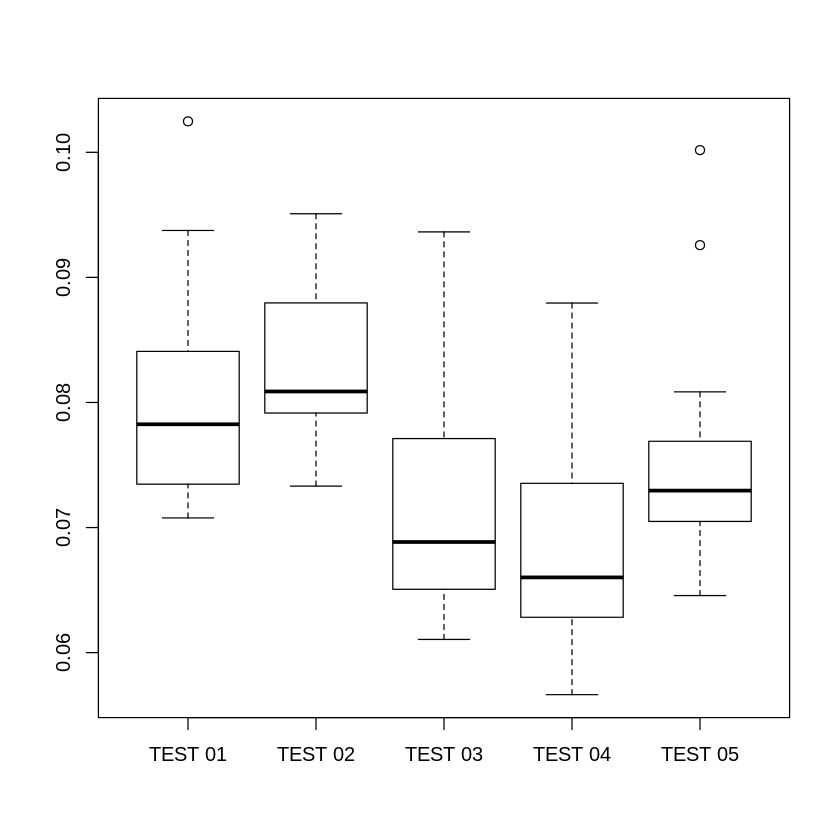

In [3]:
# Plot the friction results over tests to see if there is any visual evidence of differences in mean friction from one
# test to another. What do you conclude visually?
boxplot(Friction ~ TEST, data = lab3)

In [4]:
# Conduct an analysis of variance on the data to determine if there is a significant difference in mean frictions
model_lab3 <- aov(Friction ~ TEST, data = lab3)
summary(model_lab3)

             Df   Sum Sq   Mean Sq F value   Pr(>F)    
TEST          4 0.003829 0.0009571   17.18 1.47e-11 ***
Residuals   145 0.008076 0.0000557                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [5]:
# Conduct a multiple comparison test using the Tukey-Kramer HSD method to determine which tests are different than 
# others
TukeyHSD(model_lab3)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Friction ~ TEST, data = lab3)

$TEST
                        diff           lwr           upr     p adj
TEST 02-TEST 01  0.003285455 -0.0020375572  0.0086084679 0.4341213
TEST 03-TEST 01 -0.007555311 -0.0128783234 -0.0022322983 0.0012637
TEST 04-TEST 01 -0.010715035 -0.0160380476 -0.0053920224 0.0000012
TEST 05-TEST 01 -0.004900906 -0.0102239183  0.0004221069 0.0868287
TEST 03-TEST 02 -0.010840766 -0.0161637788 -0.0055177536 0.0000009
TEST 04-TEST 02 -0.014000490 -0.0193235029 -0.0086774777 0.0000000
TEST 05-TEST 02 -0.008186361 -0.0135093736 -0.0028633484 0.0003654
TEST 04-TEST 03 -0.003159724 -0.0084827367  0.0021632885 0.4746393
TEST 05-TEST 03  0.002654405 -0.0026686074  0.0079774178 0.6430128
TEST 05-TEST 04  0.005814129  0.0004911167  0.0111371419 0.0247319


In [6]:
# Conduct a multiple comparison test using the using the Compare Best, Hsu MCB method to determine if any of the tests 
# produced a statistically superior result ( i.e. significantly higher mean friction). What do you conclude?

# CODE HERE